# Feature Selection

## Import Libraries

In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
df = pd.read_csv("clean.csv")

In [47]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

Unnamed: 0            int64
Name                 object
Age                   int64
Nationality          object
Overall               int64
                     ...   
Release Clause       object
Height in Cms       float64
Weight in Pounds      int64
Value in Pounds     float64
Wage in Pounds      float64
Length: 85, dtype: object

The number of variables is 85
...The number of categorical variables is 38
...The number of continuous variable is 47
List of continuous predictor:
['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [49]:
features = ['International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Height in Cms', 'Weight in Pounds', 'Value in Pounds', 'Wage in Pounds']

X = df[features]
y = df['Overall']

[0.00707784 0.01502498 0.00963779 0.02092538 0.02353522 0.02348123
 0.02488339 0.025939   0.02225294 0.02562124 0.02209203 0.021068
 0.02127637 0.02990477 0.02110192 0.02143963 0.02054906 0.03268291
 0.01964362 0.02348814 0.02122747 0.02296741 0.02254187 0.02328026
 0.02332432 0.02668911 0.02641551 0.02344536 0.01998675 0.02672446
 0.02861011 0.02832052 0.02460342 0.0230692  0.02392047 0.02137551
 0.02354926 0.02504747 0.0186069  0.02014482 0.06665511 0.02786922]


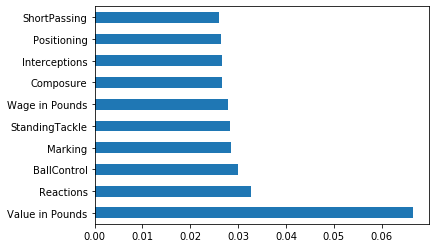

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [51]:
cat_features = ['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face']

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

Rredictor_Categorical = df[cat_features].values

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)

In [52]:
X = pd.DataFrame(Rredictor_Categorical_en)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=77777)

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k=3)
fs.fit(X_train, y_train)

fs_support = fs.get_support()
fs_feature = X.loc[:,fs_support].columns.tolist()
print(str(fs_feature), 'selected features')

[1, 3, 5] selected features


In [55]:
new = enc_pred.inverse_transform(X)

In [56]:
cate = pd.DataFrame(new)

In [57]:
cate.head()

,0,1,2,3,4,5
0,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,Yes
1,Portugal,Juventus,Right,High/ Low,C. Ronaldo,Yes
2,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,Yes
3,Spain,Manchester United,Right,Medium/ Medium,Lean,Yes
4,Belgium,Manchester City,Right,High/ High,Normal,Yes
